In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tracks.csv')
df.shape

(586672, 20)

In [3]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [4]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


### Step 1: Preprocessing and Cleaning

In [5]:
print(df.isnull().sum())

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


In [6]:
df['name'] = df['name'].fillna('Unknown Track')

In [7]:
print(df.isnull().sum())

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


In [8]:
print(df.describe())

          popularity   duration_ms       explicit   danceability  \
count  586672.000000  5.866720e+05  586672.000000  586672.000000   
mean       27.570053  2.300512e+05       0.044086       0.563594   
std        18.370642  1.265261e+05       0.205286       0.166103   
min         0.000000  3.344000e+03       0.000000       0.000000   
25%        13.000000  1.750930e+05       0.000000       0.453000   
50%        27.000000  2.148930e+05       0.000000       0.577000   
75%        41.000000  2.638670e+05       0.000000       0.686000   
max       100.000000  5.621218e+06       1.000000       0.991000   

              energy            key       loudness           mode  \
count  586672.000000  586672.000000  586672.000000  586672.000000   
mean        0.542036       5.221603     -10.206067       0.658797   
std         0.251923       3.519423       5.089328       0.474114   
min         0.000000       0.000000     -60.000000       0.000000   
25%         0.343000       2.000000     -1

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586672 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [10]:
# Most Popular Tracks
top_tracks = df.sort_values('popularity', ascending=False)[['name', 'artists', 'popularity']].head(10)
print(top_tracks)

                                         name  \
93802  Peaches (feat. Daniel Caesar & Giveon)   
93803                         drivers license   
93804                  Astronaut In The Ocean   
92810                         Save Your Tears   
92811                               telepatía   
93805                     Leave The Door Open   
92813                         Blinding Lights   
92814                            The Business   
92819                                 Bandido   
91866                                 Streets   

                                              artists  popularity  
93802    ['Justin Bieber', 'Daniel Caesar', 'Giveon']         100  
93803                              ['Olivia Rodrigo']          99  
93804                                 ['Masked Wolf']          98  
92810                                  ['The Weeknd']          97  
92811                                  ['Kali Uchis']          97  
93805  ['Bruno Mars', 'Anderson .Paak', 'Silk Sonic'

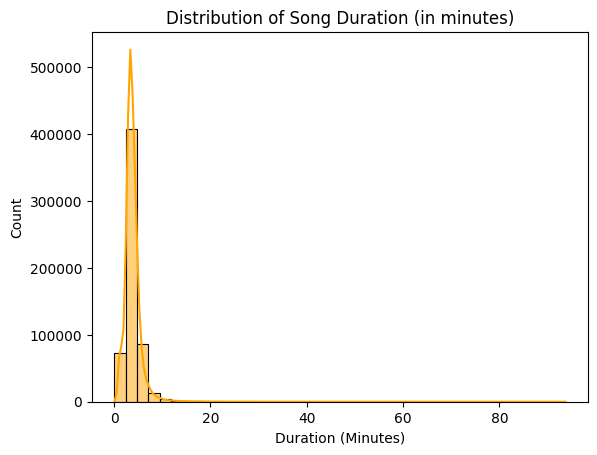

In [11]:
# Song Duration Distribution
df['duration_minutes'] = df['duration_ms'] / 60000
sns.histplot(df['duration_minutes'], bins=40, kde=True, color='orange')
plt.title('Distribution of Song Duration (in minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.show()

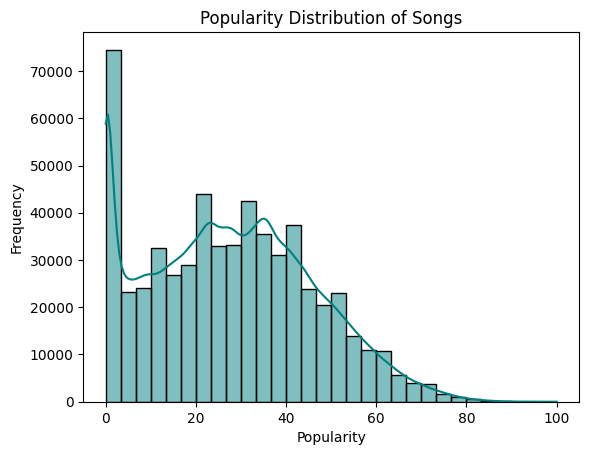

In [12]:
# Popularity Distribution
sns.histplot(df['popularity'], bins=30, kde=True, color='teal')
plt.title('Popularity Distribution of Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

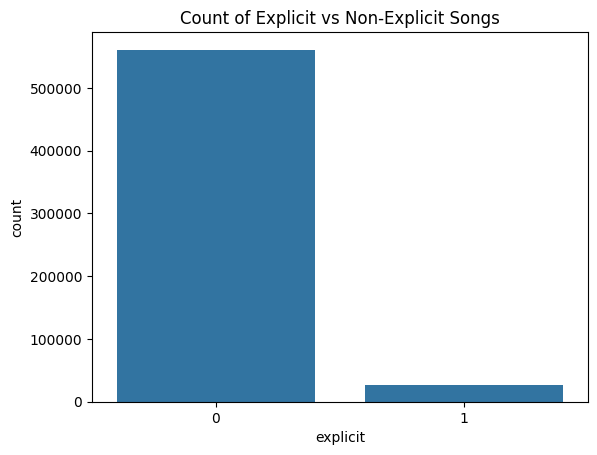

In [13]:
# Count of Explicit vs Non-Explicit Songs
sns.countplot(data=df, x='explicit')
plt.title('Count of Explicit vs Non-Explicit Songs')
plt.show()

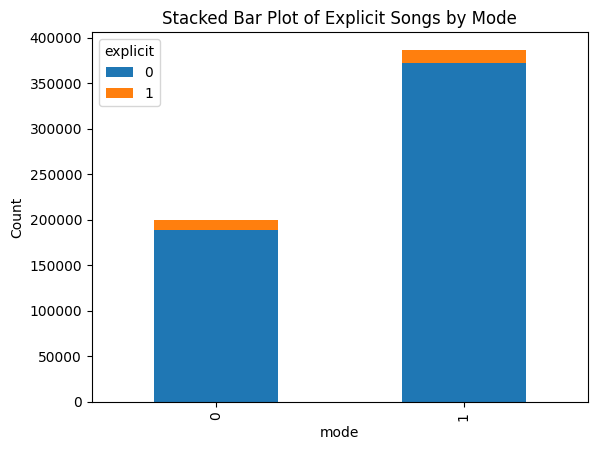

In [14]:
df.groupby(['mode', 'explicit']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Explicit Songs by Mode')
plt.ylabel('Count')
plt.show()

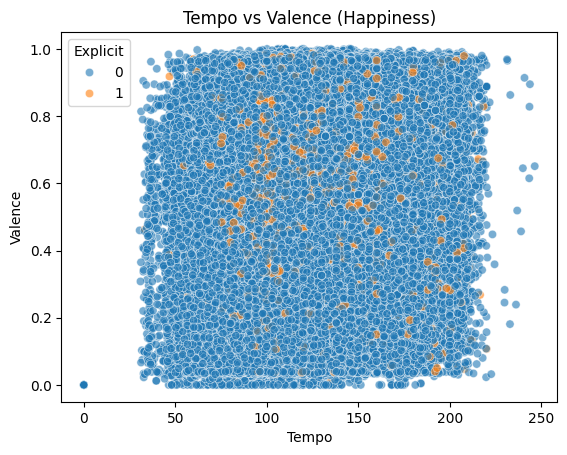

In [15]:
# Tempo vs. Valence
sns.scatterplot(data=df, x='tempo', y='valence', hue='explicit', alpha=0.6)
plt.title('Tempo vs Valence (Happiness)')
plt.xlabel('Tempo')
plt.ylabel('Valence')
plt.legend(title='Explicit')
plt.show()

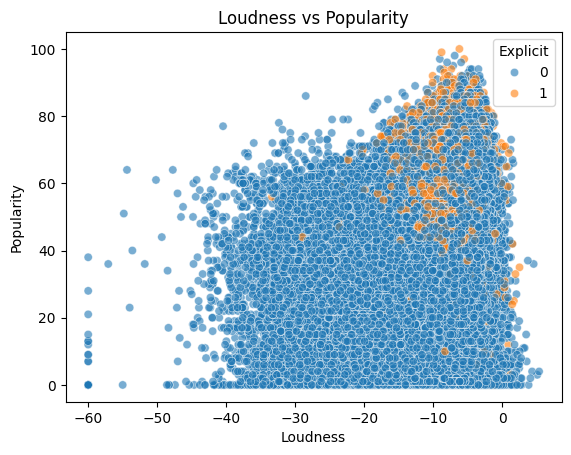

In [16]:
# Loudness vs. Popularity
sns.scatterplot(data=df, x='loudness', y='popularity', hue='explicit', alpha=0.6)
plt.title('Loudness vs Popularity')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.legend(title='Explicit')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


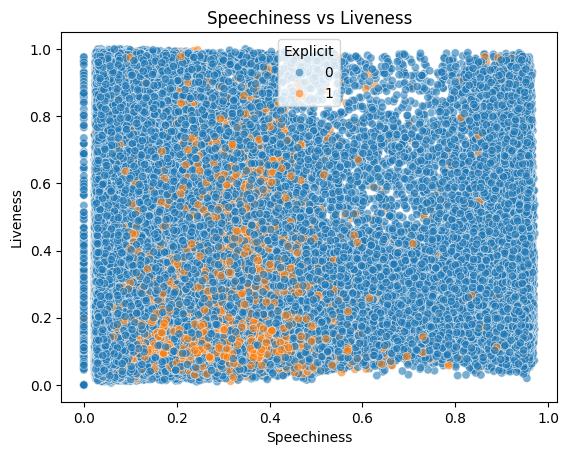

In [17]:
# Speechiness vs. Liveness
sns.scatterplot(data=df, x='speechiness', y='liveness', hue='explicit', alpha=0.6)
plt.title('Speechiness vs Liveness')
plt.xlabel('Speechiness')
plt.ylabel('Liveness')
plt.legend(title='Explicit')
plt.show()

<ipython-input-18-d741d31fc73e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


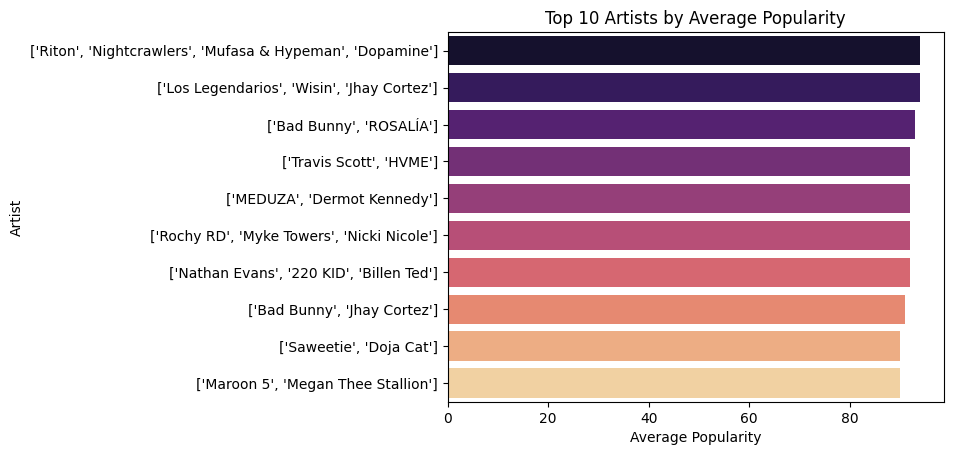

In [18]:
# Top Artists by Average Popularity
top_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.show()